In [1]:
# --- Cell 1: Our Toolkit for Discovery (Importing Libraries) ---
# Let's gather the tools we'll need for this exploration.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Here are our two discovery methods
from sklearn.cluster import KMeans             # A method for finding a specific number of groups
from scipy.cluster.hierarchy import dendrogram, linkage # Tools for a "family tree" style of grouping

In [2]:
# --- Cell 2: Preparing Our "Archaeological Dig Site" ---
# Before we can start digging for patterns, we need to prepare our data.

print("--- Step 1: Loading the clean dataset ---")
df = pd.read_csv('../data/heart_disease_cleaned.csv')
# For this exploration, we'll look at the features (X) and keep the true answers (y) aside
# so we can compare our findings to the reality later.
X = df.drop('target', axis=1)
y = df['target'] # The true labels (0=No Disease, 1=Disease)

# As before, we need to scale our features. This ensures that features with large
# numbers (like cholesterol) don't dominate the search for groups.
print("--- Step 2: Scaling the features for a fair analysis ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data is prepped. Let the discovery begin!")

--- Step 1: Loading the clean dataset ---
--- Step 2: Scaling the features for a fair analysis ---
Data is prepped. Let the discovery begin!



--- Searching for the best number of clusters using the Elbow Method ---


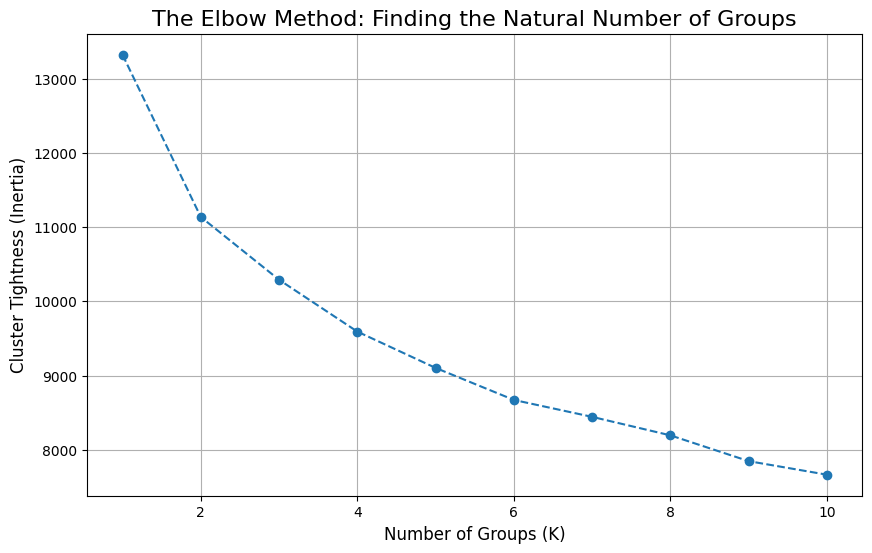

The graph shows a distinct 'elbow' around K=2. This suggests that the data naturally falls into two main groups.


In [3]:
# --- Cell 3: Finding the Right Number of Groups (The Elbow Method) ---
# We'll ask the K-Means algorithm to group the data into 1 group, then 2, then 3, and so on,
# all the way up to 10. We'll measure how tight the clusters are for each attempt.
# As we add more groups, the clusters will get tighter, but at a certain point, the
# improvement will slow down, creating a bend or "elbow" in our graph. That elbow
# often suggests a natural number of groups.

print("\n--- Searching for the best number of clusters using the Elbow Method ---")
inertia_scores = []
for k in range(1, 11):
    # Try to find 'k' clusters in the data
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

# Let's plot the results to find the elbow.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_scores, marker='o', linestyle='--')
plt.title('The Elbow Method: Finding the Natural Number of Groups', size=16)
plt.xlabel('Number of Groups (K)', size=12)
plt.ylabel('Cluster Tightness (Inertia)', size=12)
plt.grid(True)
plt.show()

print("The graph shows a distinct 'elbow' around K=2. This suggests that the data naturally falls into two main groups.")

In [4]:
# --- Cell 4: Uncovering the Two Groups and Checking Our Work ---
# Now that the Elbow Method suggests K=2, let's run the algorithm and ask it to
# assign each patient to one of two clusters.

print("\n--- Step 4: Finding the two hidden groups with K-Means ---")
# Let's find the 2 best clusters.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
discovered_clusters = kmeans.fit_predict(X_scaled)

# The Big Question: Did the algorithm discover the same groups as "Has Disease" vs. "No Disease"?
# Let's compare the clusters it found with the actual labels we kept aside.
cluster_comparison = pd.DataFrame({'Discovered_Cluster': discovered_clusters, 'Actual_Diagnosis': y})

# A cross-tabulation is a great way to see the comparison.
print("\n--- How well did our algorithm's groups match the real diagnosis? ---")
# 0 = No Disease, 1 = Has Disease
print(pd.crosstab(cluster_comparison['Discovered_Cluster'], cluster_comparison['Actual_Diagnosis']))
print("\nInterpretation: This table shows how many patients from each 'Actual_Diagnosis' group ended up in each 'Discovered_Cluster'. A perfect discovery would have high numbers on the diagonal and low numbers (or zeros) off the diagonal.")


--- Step 4: Finding the two hidden groups with K-Means ---

--- How well did our algorithm's groups match the real diagnosis? ---
Actual_Diagnosis      0    1
Discovered_Cluster          
0                   334   61
1                   165  465

Interpretation: This table shows how many patients from each 'Actual_Diagnosis' group ended up in each 'Discovered_Cluster'. A perfect discovery would have high numbers on the diagonal and low numbers (or zeros) off the diagonal.



--- Building a 'Family Tree' (Dendrogram) of the data ---


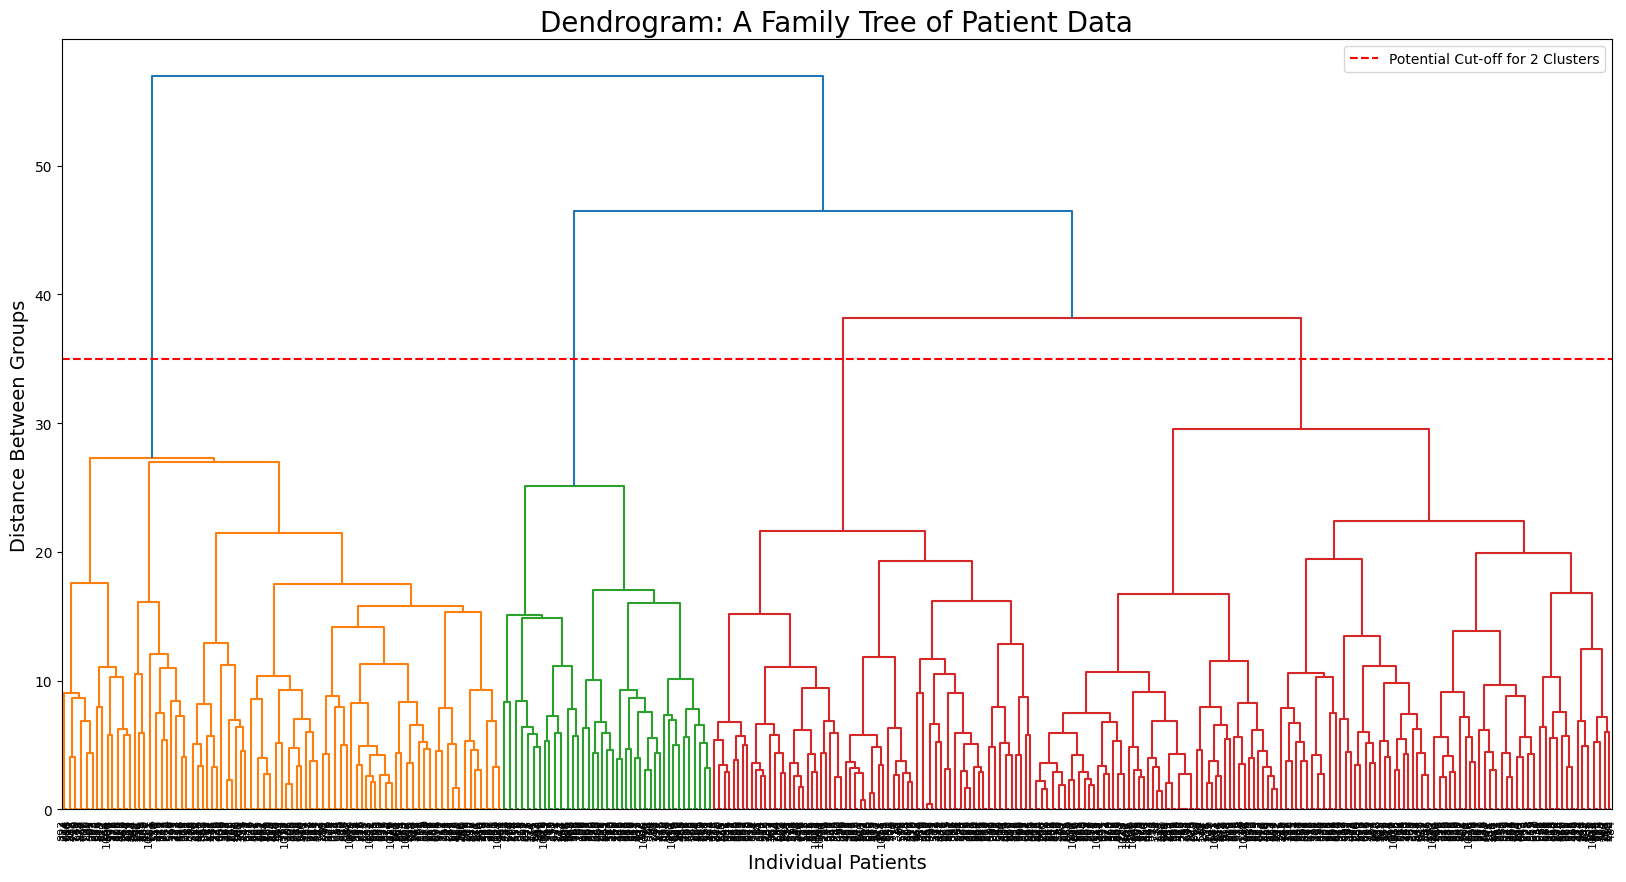


Interpretation: Reading the dendrogram from the bottom up shows how individual patients (leaves) are merged into small clusters, which then merge into larger ones. If we draw a horizontal line that crosses two main vertical trunks (like the red dashed line), it suggests that, like K-Means, the data naturally splits into two primary super-groups.


In [5]:
# --- Cell 5: Building a "Family Tree" of Our Data ---
# The dendrogram shows the entire hierarchy of clusters. Long vertical lines represent
# greater distance (dissimilarity) between groups.

print("\n--- Building a 'Family Tree' (Dendrogram) of the data ---")
# We first need to calculate the "linkage" which determines the structure of the tree.
linkage_matrix = linkage(X_scaled, method='ward')

# Now, we can plot the beautiful dendrogram.
plt.figure(figsize=(20, 10))
plt.title('Dendrogram: A Family Tree of Patient Data', size=20)
plt.xlabel('Individual Patients', size=14)
plt.ylabel('Distance Between Groups', size=14)
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
# We can draw a horizontal line to "cut" the tree at a certain level to form clusters.
# Cutting where the vertical lines are longest often gives good results.
plt.axhline(y=35, color='r', linestyle='--', label='Potential Cut-off for 2 Clusters')
plt.legend()
plt.show()

print("\nInterpretation: Reading the dendrogram from the bottom up shows how individual patients (leaves) are merged into small clusters, which then merge into larger ones. If we draw a horizontal line that crosses two main vertical trunks (like the red dashed line), it suggests that, like K-Means, the data naturally splits into two primary super-groups.")